In [1]:
%matplotlib nbagg

import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Importez les données sous forme d'un dataframe. Familiarisez-vous avec le tableau des données : Vérifiez la taille du tableau, regardez le type des différentes variables etc.

 ##### Distribution marginale
 ---

2. Calculez les statistiques d'ordre de la variable **flavanoids**. 

3. En déduire les quartiles de cette variable. Quelle statistique de dispersion pouvez-vous calculer à partir de vos résultats précédents ? Calculez cette statistique.

4. Quelle représentation graphique vous permettrait de répondre à la question 3 ? Affichez ce graphique.

5. Calculez la distribution (les valeurs et fréquences) de la variable **flavanoids**. Définissez une fonction qui prends en paramètres un entier r, des valeurs et des fréquences et qui renvoie le moment centré d'ordre r. Utilisez cette fonction pour calculer la variance de la variable **flavanoids** à partir de sa distribution.

 ##### Distribution conditionnelle
 ---

6. Calculez la moyenne conditionnelle et la variance conditionnelle de la variable **alcohol** sachant que la variable **class** vaut 0, 1 et 2. Interpretez les résultats.

7. Affichez sur une même figure l'histogramme de la distribution de la variable **alcohol** sachant que la variable **class** vaut 0, 1 et 2 (conseil: utilisez le paramètre **alpha** de la fonction hist pour mieux voir les superpositions). En quoi cette représentation graphique confirme vos précédents résultats ?

8. Calculez les fréquences de la variable **alcohol** pour les intervalles (10.,12.5], (12.5,13.5] et (13.5,15.] sachant que la variable **class** vaut 0, 1 et 2. (La notation (a,b] signifie que l'intervalle est ouvert à gauche et fermé à droite)

 ##### Distribution jointe et statistiques de dépendance
 ---

9. Affichez le nuage de points des variables **flavanoids** et **total_phenols** et le nuage de points des variables **flavanoids** et **nonflavanoid_phenols** sur des figures différentes (mais dans une même fenêtre). Interpretez ces deux graphiques.
    
10. Quelle statistique utiliseriez-vous pour justifier votre réponse à la question précédente ? Justifiez votre choix et calculez la valeur de cette statistique pour les deux cas.
    
11. À partir des résultats de la question 8, comment feriez-vous pour calculer la distribution jointe des variables **alcohol** et **class** ? (où les valeurs sont 0, 1 et 2 pour la variable class et les intervalles (10.,12.5], (12.5,13.5] et (13.5,15.] pour la variable alcohol) Calculez cette distribution jointe. Faites le produit entre la distribution marginale de la variable **alcohol** et celle de la variable **class**. Qu'est-ce que vous en concluez ? 

12. Ecrivez une fonction **scatter_matrix** qui trace les nuages de points de toutes les variables du tableau de données passé à la fonction en argument, où les graphiques sont organisés en forme de matrice (c'est à dire que le nuage de points des variables i et j se trouve sur la ième ligne et la jème ligne dans la fenêtre). Appliquez cette fonction à votre tableau de données et comparez votre résultat à la matrice de corrélations.

13. Imaginez que l'on veuille maintenant prédire la variable **class** en fonction des autres variables. Dans ce cas, quelles variables seraient utiles pour faire cette prédiction ? Justifiez votre choix.

## Question 1.

In [2]:
from sklearn.datasets import load_wine
vins = load_wine()
Data = pd.DataFrame(vins['data'],columns=vins['feature_names'])
Data['class'] = vins['target']

In [3]:
Data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
Data.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
class                             int32
dtype: object

In [5]:
Data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


## Question 2.

Pour calculer les statistiques d'ordre, il suffit de les ordonner dans l'ordre croissant:

In [6]:
stats_ordre = Data['flavanoids'].sort_values()
stats_ordre[:10] # Je n'affiche que les 10 premières pour ne pas avoir un affichage trop grand

146    0.34
136    0.47
165    0.47
138    0.48
170    0.49
141    0.50
140    0.50
171    0.51
142    0.52
145    0.55
Name: flavanoids, dtype: float64

## Question 3.

On peut obtenir un quantile d'ordre $\alpha$ en calculant $X_{(\lceil\alpha n\rceil)}$ (avec $n$ le nombre de données). Ainsi, en utilisant les statistiques d'ordre, on calcule les quartiles de la façon suivante:

In [7]:
n = Data['flavanoids'].count()
for name, alpha in zip(['premier quartile','mediane','troisième quartile'],[0.25, 0.5, 0.75]):
    quartile = stats_ordre.iloc[int(np.ceil(alpha*n))-1]
    print(name+': '+str(quartile))

premier quartile: 1.2
mediane: 2.13
troisième quartile: 2.88


PS: le module pandas calcule les quantiles avec la fonction percentile du module numpy. Cette dernière utilise par défaut une interpolation ce qui explique pourquoi on obtient des résultats légèrement différent entre notre méthode et celle de pandas:

In [8]:
Data['flavanoids'].quantile([0.25, 0.5, 0.75])

0.25    1.205
0.50    2.135
0.75    2.875
Name: flavanoids, dtype: float64

À partir des quartiles, nous pouvons calculer l'écart interquartile:

In [9]:
stats_ordre.iloc[int(np.ceil(0.75*n))-1] - stats_ordre.iloc[int(np.ceil(0.25*n))-1]

1.6799999999999999

## Question 4.

Le graphique qui permet de voir le plus simplement les quartiles et l'écart interquartile et la boite à moustache (boxplot):

<IPython.core.display.Javascript object>


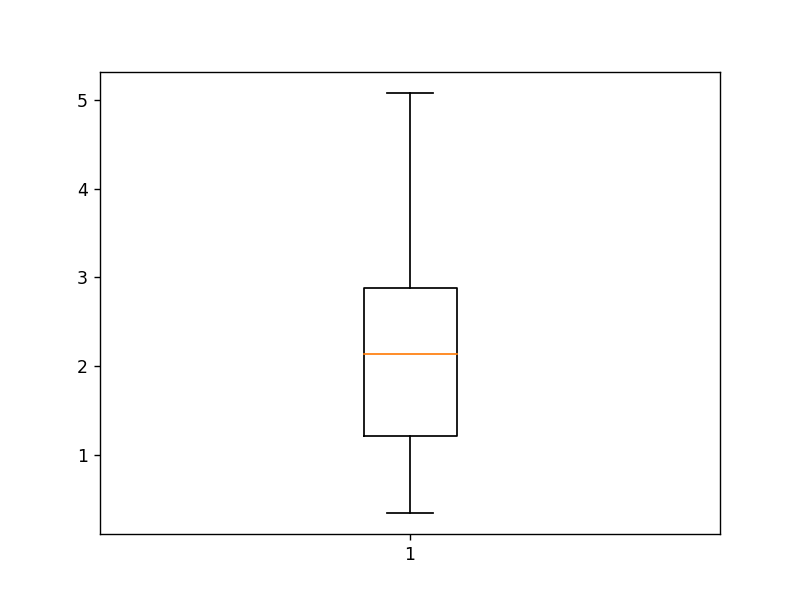

In [10]:
plt.figure(1)
plt.boxplot(Data['flavanoids']);

On peut aussi retrouver ces informations sur une représentation graphique de la fonction de répartition en ajoutant les droites horizontales $y=0.25$, $y=0.5$ et $y=0.75$ et en regardant l'abscisse où ces droites coupent la fonction de répartition.

## Question 5.

On commence par définir une fonction val_freq() qui renvoie les valeurs et les fréquences pour une colonne de notre jeu de données. Puis on l'utilise pour pour calculer la distribution de la variable **flavanoids** 

In [11]:
def val_freq(colonne):
    valeurs = Data[colonne].unique()
    valeurs.sort()
    frequences = np.zeros(valeurs.size)
    for i, v in enumerate(valeurs):
        frequences[i] = Data.loc[Data[colonne]==v,colonne].count()
    frequences /= Data[colonne].count()
    return valeurs, frequences

In [12]:
v, f = val_freq('flavanoids')
f.sum()

1.0

Pour calculer le moment centré d'ordre r à partir de la distribution d'une variable, on utilise la formule du cours: $m_r =\sum_{i=1}^N f_i (v_i - \bar{X}_n)^r$ avec $\bar{X}_n = \sum_{i=1}^N f_i v_i$.

In [13]:
def moment_centre(val,freq,r):
    moyenne = np.sum(val*freq)
    return np.sum(freq*np.power(val - moyenne,r))

On utilise la fonction moment_centre() pour calculer la variance de la variable **flavanoids**:

In [14]:
moment_centre(v,f,2.)

0.99211351155157168

PS: la fonction var() du module pandas utilise une formule de la variance avec une autre normalisation (cela s'explique avec certaines notions de statistiques inférentielles): elle divise par n-1 au lieu de n. Donc en multipliant par (n-1)/n on retrouve notre résultat:

In [15]:
n = Data['flavanoids'].count()
Data['flavanoids'].var()*((n-1)/float(n))

0.99211351155157135

## Question 6.

Moyenne conditionnelle de la variable alcohol sachant que la variable class vaut 0:

In [16]:
Data.loc[Data['class']==0,'alcohol'].mean()

13.744745762711865

Moyenne conditionnelle de la variable alcohol sachant que la variable class vaut 1:

In [17]:
Data.loc[Data['class']==1,'alcohol'].mean()

12.278732394366198

Moyenne conditionnelle de la variable alcohol sachant que la variable class vaut 2:

In [18]:
Data.loc[Data['class']==2,'alcohol'].mean()

13.153749999999997

ou encore:

In [19]:
Data.groupby('class')['alcohol'].agg('mean')

class
0    13.744746
1    12.278732
2    13.153750
Name: alcohol, dtype: float64

On observe que la moyenne de la variable **alcohol** change un peu conditonnellement à la variable **class**. Il est donc possible que ces deux variables ne soient pas indépendantes.

## Question 7.

<IPython.core.display.Javascript object>


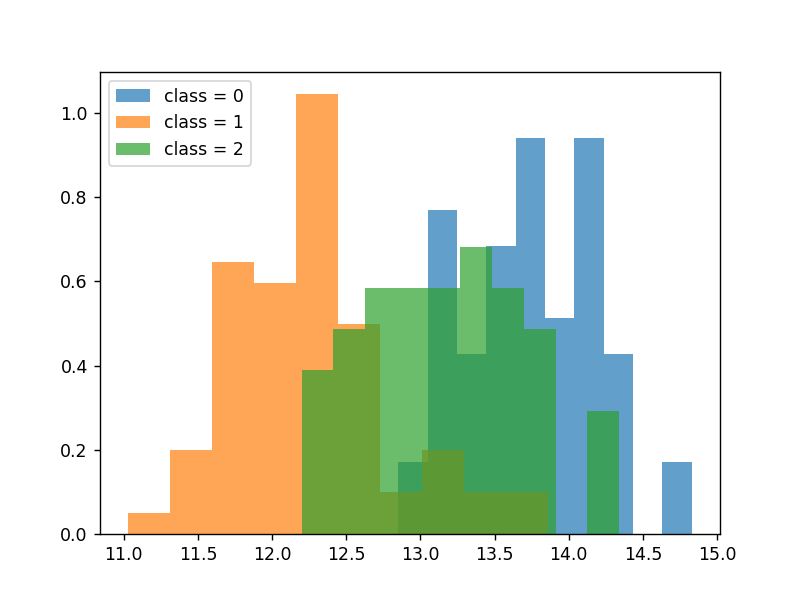

In [20]:
plt.figure(2)
plt.hist(Data.loc[Data['class']==0,'alcohol'],normed=True,alpha=0.7,label='class = 0')
plt.hist(Data.loc[Data['class']==1,'alcohol'],normed=True,alpha=0.7,label='class = 1')
plt.hist(Data.loc[Data['class']==2,'alcohol'],normed=True,alpha=0.7,label='class = 2')
plt.legend(loc='best');

ou encore:

<IPython.core.display.Javascript object>


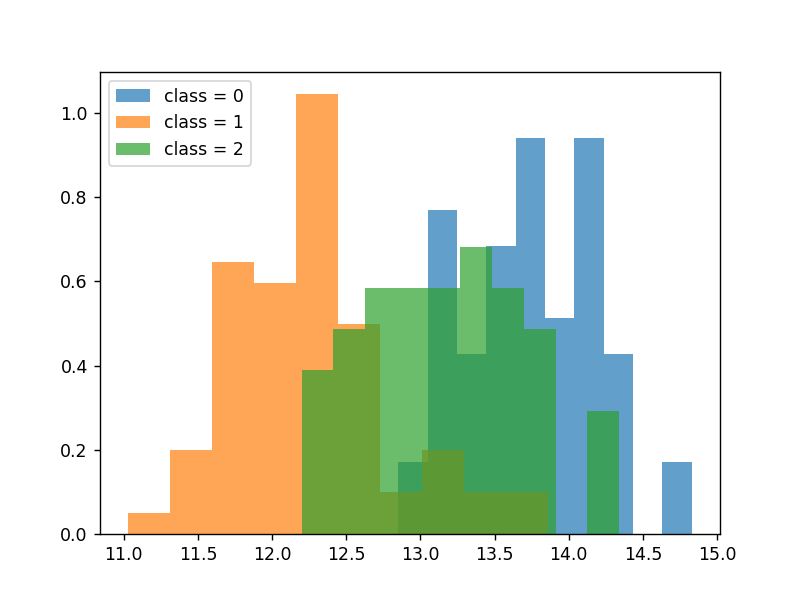

In [21]:
plt.figure(3)
for name, group in Data.groupby('class'):
    plt.hist(group['alcohol'],normed=True,alpha=0.7,label='class = {}'.format(name))
plt.legend(loc='best');

On remarque que la distribution conditionnelle de la variable **alcohol** sachant la variable **class** change nettement selon la valeur de **class**. Cela renforce notre hypothèse que ces deux variables ne soient pas indépendantes.

## Question 8.

In [22]:
dist_condi = pd.DataFrame(np.zeros((3,3)),columns=['Intervalle1','Intervalle2','Intervalle3'])
# Fréquences sachant que class = 0
dist_condi.iloc[0,0] = Data.loc[(Data['class']==0)&(Data['alcohol']>10.)&(Data['alcohol']<=12.5),'alcohol'].count()
dist_condi.iloc[0,1] = Data.loc[(Data['class']==0)&(Data['alcohol']>12.5)&(Data['alcohol']<=13.5),'alcohol'].count()
dist_condi.iloc[0,2] = Data.loc[(Data['class']==0)&(Data['alcohol']>13.5)&(Data['alcohol']<=15.),'alcohol'].count()
dist_condi.iloc[0,:] /= Data.loc[Data['class']==0,'alcohol'].count()
# Fréquences sachant que class = 1
dist_condi.iloc[1,0] = Data.loc[(Data['class']==1)&(Data['alcohol']>10.)&(Data['alcohol']<=12.5),'alcohol'].count()
dist_condi.iloc[1,1] = Data.loc[(Data['class']==1)&(Data['alcohol']>12.5)&(Data['alcohol']<=13.5),'alcohol'].count()
dist_condi.iloc[1,2] = Data.loc[(Data['class']==1)&(Data['alcohol']>13.5)&(Data['alcohol']<=15.),'alcohol'].count()
dist_condi.iloc[1,:] /= Data.loc[Data['class']==1,'alcohol'].count()
# Fréquences sachant que class = 2
dist_condi.iloc[2,0] = Data.loc[(Data['class']==2)&(Data['alcohol']>10.)&(Data['alcohol']<=12.5),'alcohol'].count()
dist_condi.iloc[2,1] = Data.loc[(Data['class']==2)&(Data['alcohol']>12.5)&(Data['alcohol']<=13.5),'alcohol'].count()
dist_condi.iloc[2,2] = Data.loc[(Data['class']==2)&(Data['alcohol']>13.5)&(Data['alcohol']<=15.),'alcohol'].count()
dist_condi.iloc[2,:] /= Data.loc[Data['class']==2,'alcohol'].count()
dist_condi

,Intervalle1,Intervalle2,Intervalle3
0,0.000000,0.305085,0.694915
1,0.732394,0.239437,0.028169
2,0.104167,0.645833,0.250000


In [23]:
dist_condi.sum(1)

0    1.0
1    1.0
2    1.0
dtype: float64

L'index pour les lignes correspondent aux valeurs de la variable **class** et les noms de colonnes sont les valeurs de la variable **alcohol** avec Intervalle1: (10.,12.5], Intervalle2: (12.5,13.5] et Intervalle3: (13.5,15.].

## Question 9.

<IPython.core.display.Javascript object>


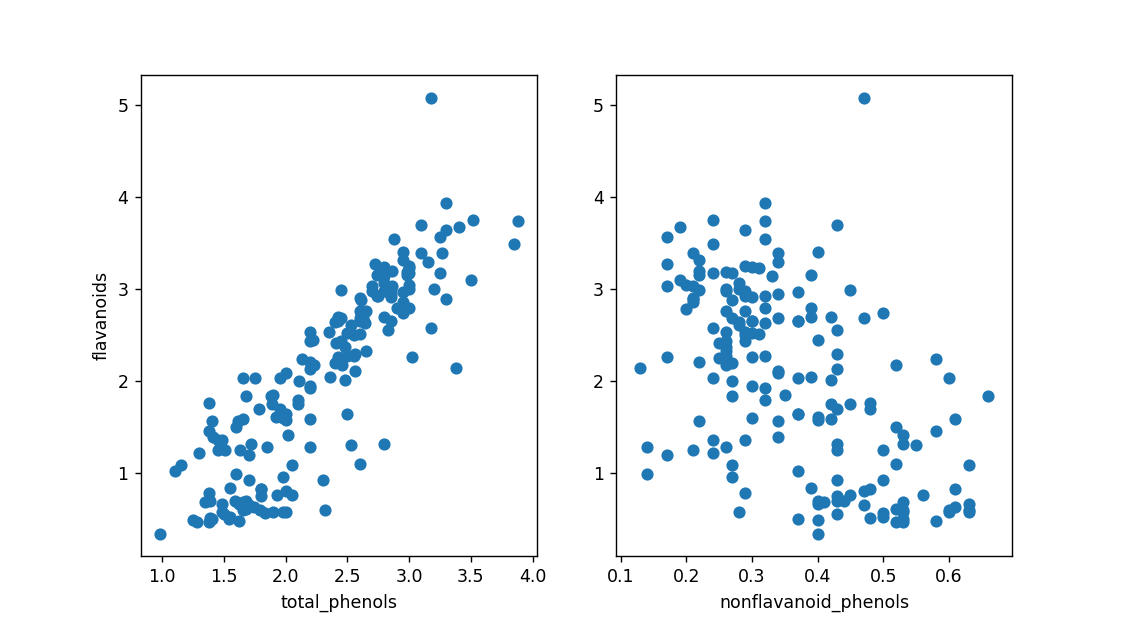

In [24]:
plt.figure(4,figsize=(9,5))

plt.subplot(121)
plt.scatter(Data['total_phenols'],Data['flavanoids'])
plt.xlabel('total_phenols');
plt.ylabel('flavanoids');
plt.subplot(122)
plt.scatter(Data['nonflavanoid_phenols'],Data['flavanoids'])
plt.xlabel('nonflavanoid_phenols');

D'après les deux nuages de points, la variable **flavanoids** semble être corrélée positivement avec la variable **total_phenols** et négativement avec la variable **nonflavanoid_phenols**.

## Question 10.

Pour justifer la réponse à la question précédente, on peut utiliser une statistique de dépendance comme la statistique de corrélation:

In [25]:
Data.corr().loc['flavanoids','total_phenols']

0.86456350009511562

In [26]:
Data.corr().loc['flavanoids','nonflavanoid_phenols']

-0.5378996119051983

## Question 11.

Pour calculer la distribution jointe de la variable **alcohol** et de la variable **class**, on peut multiplier la distribution conditionnelle de la variable **alcohol** sachant la variable **class** par la distribution marginale de la variable **class**. En utilisant les résultats de la question 8, on obtient:

In [27]:
dist_marginale_C = np.zeros((3,3))
n = Data['class'].count()
dist_marginale_C[0,:] = Data.loc[Data['class']==0,'class'].count()/float(n)
dist_marginale_C[1,:] = Data.loc[Data['class']==1,'class'].count()/float(n)
dist_marginale_C[2,:] = Data.loc[Data['class']==2,'class'].count()/float(n)
dist_marginale_C

array([[ 0.33146067,  0.33146067,  0.33146067],
       [ 0.3988764 ,  0.3988764 ,  0.3988764 ],
       [ 0.26966292,  0.26966292,  0.26966292]])

In [28]:
dist_jointe = dist_condi * dist_marginale_C
dist_jointe

,Intervalle1,Intervalle2,Intervalle3
0,0.000000,0.101124,0.230337
1,0.292135,0.095506,0.011236
2,0.028090,0.174157,0.067416


In [29]:
dist_jointe.values.sum()

1.0

Faisons maintenant le produit des deux distributions marginales:

In [30]:
dist_marginale_A = np.zeros((3,3))
n = Data['alcohol'].count()
dist_marginale_A[:,0] = Data.loc[(Data['alcohol']>10.)&(Data['alcohol']<=12.5),'alcohol'].count()/float(n)
dist_marginale_A[:,1] = Data.loc[(Data['alcohol']>12.5)&(Data['alcohol']<=13.5),'alcohol'].count()/float(n)
dist_marginale_A[:,2] = Data.loc[(Data['alcohol']>13.5)&(Data['alcohol']<=15.),'alcohol'].count()/float(n)

dist_marginale_A * dist_marginale_C

array([[ 0.1061419 ,  0.12290115,  0.10241762],
       [ 0.12773008,  0.14789799,  0.12324833],
       [ 0.08635273,  0.09998738,  0.08332281]])

On voit que le produit des deux distributions marginales n'est pas égale à la distribution jointe donc les variables **alcohol** et **class** ne sont pas indépendantes.

## Question 12.

In [31]:
def scatter_matrix(tableau):
    # scatter plot matrix with all variables
    L = tableau.shape[1]
    plt.figure(5,figsize=(2*L,2*L))

    i = 0
    for l in range(L):
        for k in range(L):
            i += 1
            h = plt.subplot(L,L,i)
            plt.scatter(tableau[tableau.columns[l]],tableau[tableau.columns[k]]) 
            for xlabel_i in h.axes.get_xticklabels():
                xlabel_i.set_visible(False)                
            for ylabel_i in h.axes.get_yticklabels():
                ylabel_i.set_visible(False)  
            if (l==L-1):
                plt.xlabel(tableau.columns[k])
            if (k==0):
                plt.ylabel(tableau.columns[l])

<IPython.core.display.Javascript object>


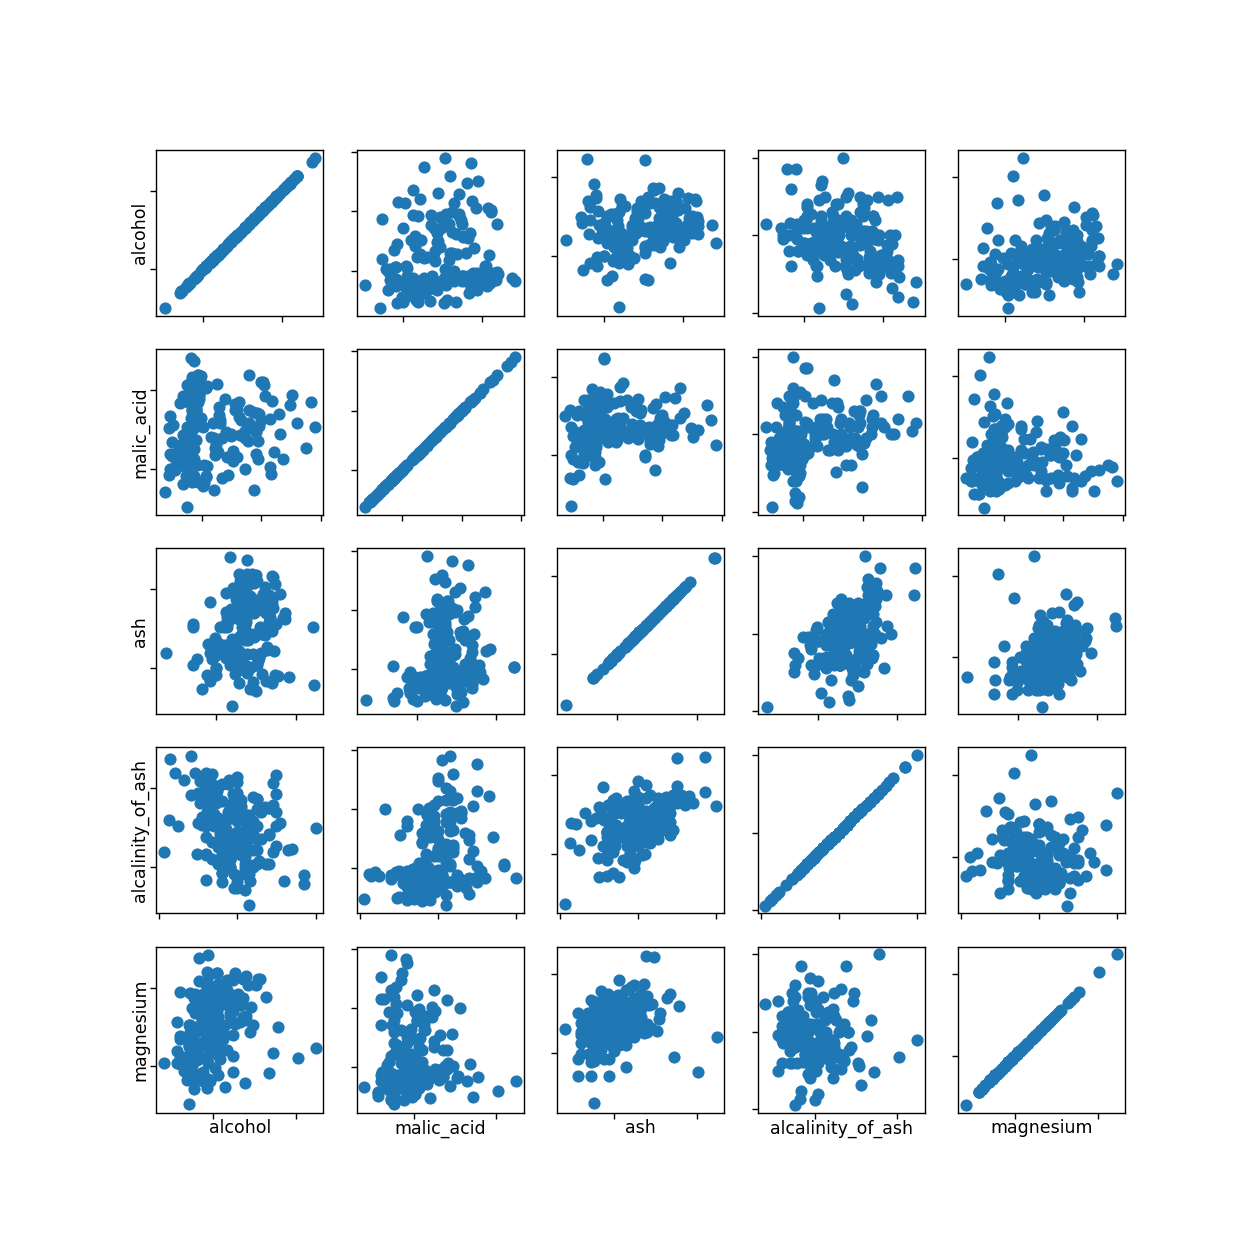

In [32]:
scatter_matrix(Data.iloc[:,:5]) # On affiche que les 5 premières variables pour que ça rentre dans la fenêtre

<IPython.core.display.Javascript object>


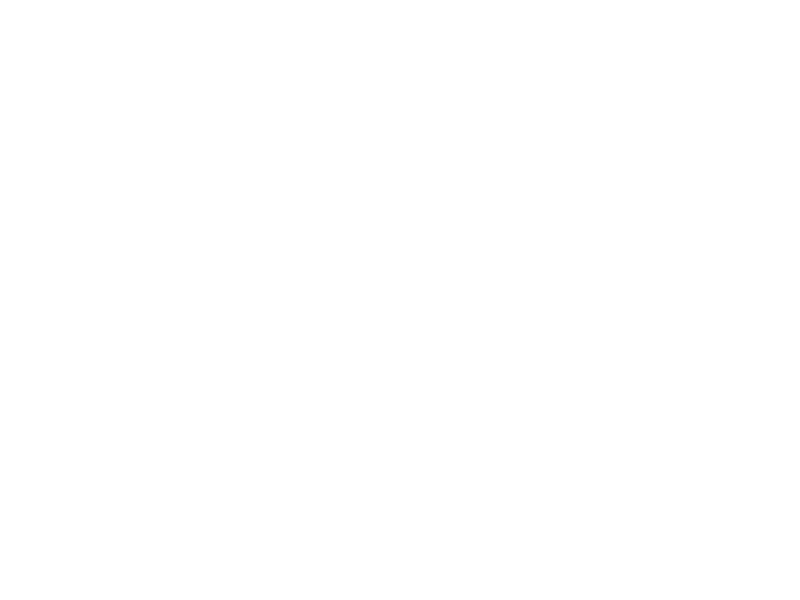

<IPython.core.display.Javascript object>


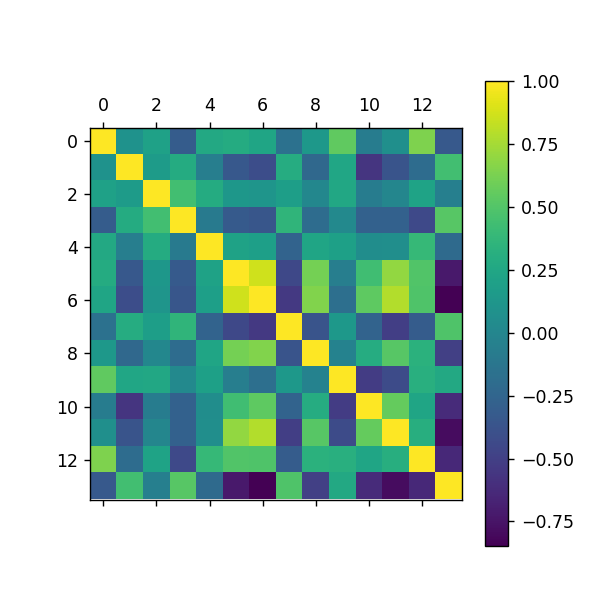

In [33]:
plt.figure(6)
plt.matshow(Data.corr())
plt.colorbar();

## Question 13.

Pour prédire la variable **class** il serait utile de choisir des variables qui sont liées avec elle, comme par exemple la variable **alcohol**, ou encore des variables qui sont corrélées avec elle, comme par exemple les variables **total_phenols**, **flavanoids** ou encore **od280/od315_of_diluted_wines**.

In [34]:
Data.corr()['class']

alcohol                        -0.328222
malic_acid                      0.437776
ash                            -0.049643
alcalinity_of_ash               0.517859
magnesium                      -0.209179
total_phenols                  -0.719163
flavanoids                     -0.847498
nonflavanoid_phenols            0.489109
proanthocyanins                -0.499130
color_intensity                 0.265668
hue                            -0.617369
od280/od315_of_diluted_wines   -0.788230
proline                        -0.633717
class                           1.000000
Name: class, dtype: float64